# Exploratory Data Analysis (EDA) Notebook

In [1]:
import matplotlib.pyplot as plt
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Setting Visualization Aesthetics
sns.set(style="whitegrid")

# Section 1: Understanding Random Variables
Random variables are columns in a dataset that can be either numerical or categorical.
Numerical variables can be:
  - Continuous: Values with decimals (e.g., height in cm)
  - Discrete: Whole numbers (e.g., count of items)
Categorical variables can be:
  - Nominal: Unordered categories (e.g., eye color)
  - Ordinal: Ordered categories (e.g., education level)

In [3]:
from sklearn.datasets import fetch_california_housing

# Load example dataset
dataset = fetch_california_housing(download_if_missing=True)

# Create a Pandas DataFrame
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

# Display the DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.iloc[0]

,0
MedInc,8.325200
HouseAge,41.000000
AveRooms,6.984127
AveBedrms,1.023810
Population,322.000000
AveOccup,2.555556
Latitude,37.880000
Longitude,-122.230000
target,4.526000


# Section 2: Descriptive Statistics
Exploring key metrics such as mean, median, mode, variance, and IQR.


In [5]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [6]:
# Compute Descriptive Statistics
age = df['HouseAge']

In [7]:
# Mean: Sum of all values divided by the number of values
mean_age = sum(age) / len(age)  # or df['HouseAge'].mean()
mean_age

28.639486434108527

In [8]:
# Median: Middle value when sorted
sorted_age = sorted(age)
n = len(sorted_age)
if n % 2 == 0:
    median_age = (sorted_age[n // 2 - 1] + sorted_age[n // 2]) / 2
else:
    median_age = sorted_age[n // 2]

# or df['HouseAge'].median()
median_age

29.0

In [9]:
# Mode: Most frequently occurring value
mode_age = age.mode()[0]

In [10]:
# Variance: Average squared deviation from the mean
variance_age = sum((x - mean_age) ** 2 for x in age) / (len(age) - 1)
variance_age

158.39626040778117

In [11]:
# Standard Deviation: Square root of variance
std_dev_age = variance_age ** 0.5  # or df['HouseAge'].std()
std_dev_age

12.585557612111637

In [12]:
# IQR: Q3 - Q1
q1 = np.percentile(age, 25)
q3 = np.percentile(age, 75)
iqr = q3 - q1
iqr

19.0

In [13]:
print("\nDescriptive Statistics for 'HouseAge':")
print(f"Mean: {mean_age}")
print(f"Median: {median_age}")
print(f"Mode: {mode_age}")
print(f"Variance: {variance_age}")
print(f"Standard Deviation: {std_dev_age}")
print(f"IQR: {iqr}")


Descriptive Statistics for 'HouseAge':
Mean: 28.639486434108527
Median: 29.0
Mode: 52.0
Variance: 158.39626040778117
Standard Deviation: 12.585557612111637
IQR: 19.0



# Section 3: Data Cleaning and Preparation
Ensuring data quality by handling missing values, duplicates, and inconsistencies.


In [14]:
# Example: Handling Missing Values
non_cleaned_data = df.copy()
non_cleaned_data.loc[2, 'AveRooms'] = np.nan
print("\nData with Missing Value:")
non_cleaned_data


Data with Missing Value:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,NaN,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [15]:
# Fill Missing Values with Median
sorted_AveRooms = non_cleaned_data['AveRooms'].dropna().sort_values()
median = sorted_AveRooms.median()
median

5.2290909090909095

In [16]:
non_cleaned_data['AveRooms'] = non_cleaned_data['AveRooms'].fillna(median)
print("\nData with Filled Missing Values:")
non_cleaned_data


Data with Filled Missing Values:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,5.229091,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Section 4: Data Visualization
Visualizing data using histograms, scatter plots, and box plots.

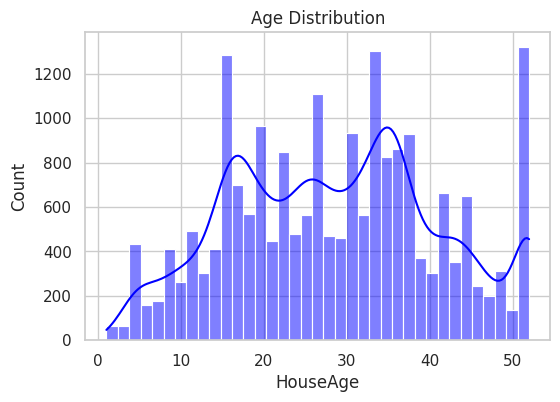

In [17]:
# Univariate Visualization
plt.figure(figsize=(6, 4))
sns.histplot(df['HouseAge'], kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

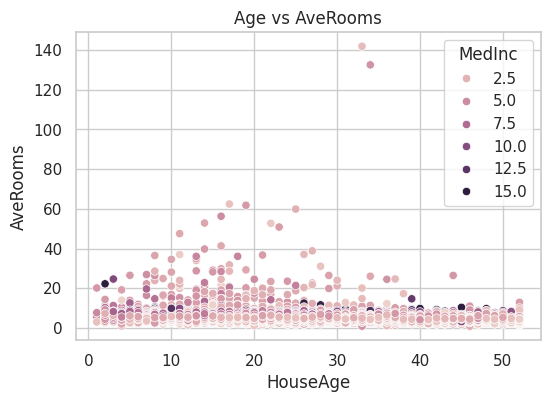

In [18]:
# Bivariate Visualization
plt.figure(figsize=(6, 4))
sns.scatterplot(x="HouseAge", y="AveRooms", data=df, hue="MedInc")
plt.title("Age vs AveRooms")
plt.show()

In [ ]:
# Multivariate Visualization
sns.pairplot(df[['HouseAge', 'AveRooms', 'MedInc']], hue="MedInc")
plt.show()

# Section 5: Exercises
1. Load a dataset of your choice and identify its random variables. (https://scikit-learn.org/1.5/api/sklearn.datasets.html)
2. Explore each column of the dataset.
3. Calculate descriptive statistics (mean, median, mode, variance, standard deviation, IQR) for at least two numerical variables.
4. Clean the data by handling missing values and removing duplicates.
5. Identify outliers using the IQR method and handle them appropriately.